# Projet final TP4
By AMAR Papa & BAH Alpha


## Exploration de l'import CAMILLE

In [215]:
# Imports
import os
import textract

In [216]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

In [217]:
# Compter le nombre de documents dans le corpus
path = "../data/txt/"
files = sorted(os.listdir(path))
len(files)

501

In [218]:
print(f"Il y a {count_newspapers['JB838']} exemplaires du journal Le Soir et {count_newspapers['JB427']} exemplaires de Le Drapeau rouge")

Il y a 500 exemplaires du journal Le Soir et 0 exemplaires de Le Drapeau rouge


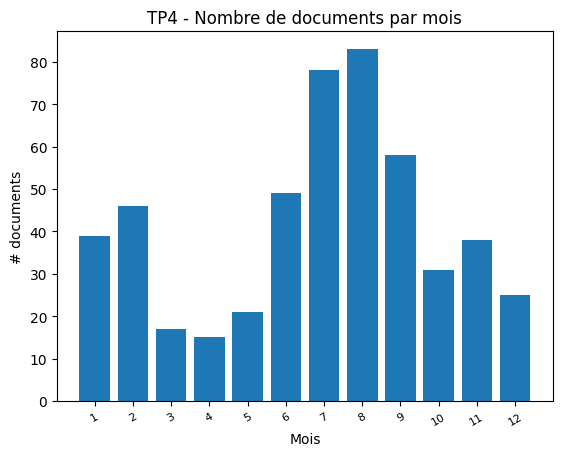

In [219]:
# Visualisation du nombre de document par mois
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('TP4 - Nombre de documents par mois')
plt.show()

## Créer un grand fichier 'corpus': commande bash

In [2]:
data_path = '../data/'
txt_path = '../data/'

In [3]:
with open("../data/all.txt", "w", encoding="utf-8") as output_file:
    for file in os.listdir(txt_path):
        if file.endswith(".txt"):
            with open(os.path.join(txt_path, file), "r", encoding="utf-8") as f:
                output_file.write(f.read())


In [4]:
# Compter le nombre de mots dans l'ensemble du corpus
file = open(r"C:\Users\Paco\Documents\STIC-B545\tac\data\all.txt", "rt", encoding="utf-8")
data = file.read()
words = data.split()

print('Number of words in text file :', len(words))

Number of words in text file : 3137248


## Analyse de la distribution du vocabulaire

In [23]:
# Imports et dépendances
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Paco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Créer une une liste de stopwords
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ceux", "toute", "tel", "ni", "ou", "avoir", 
       "aussi", "pour", "de", "le", "la", "en", "une", "un", "votre", "notre", "leur",
       "trop", "vers", "peu", "ici", "leurs", "pres", "car", "tres", "des", "je"]
sw = set(sw)

In [25]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

209 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'car', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'ceux', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'ici', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'leurs', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 

##### Tokenization

In [26]:
# Récupération du contenu du fichier
path = "../data/all.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [27]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

4109730 words found


##### Calculer la taille du vocabulaire

In [28]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1526865 words kept (123474 different word forms)


### Récupérer les mots les plus fréquents et en faire un plot

In [245]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

[('congo', 8832),
 ('gouvernement', 7506),
 ('ministre', 6335),
 ('président', 5197),
 ('lumumba', 4814),
 ('pays', 4615),
 ('général', 4294),
 ('belgique', 3892),
 ('congolais', 3845),
 ('belges', 3838)]

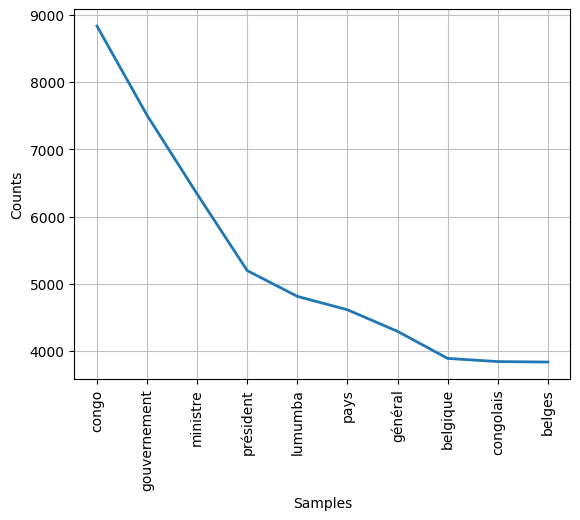

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [561]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=False)

### Nuages de mots / Wordcloud

In [269]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Paco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Stopwords
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "les", "plus", "cette", 
       "fait", "faire", "être", "deux", "ceux", "toute", "tel", "ni", "ou",  "jamais", 
       "aussi", "pour", "de", "le", "la", "en", "une", "un", "votre", "notre", "leur",
       "trop", "vers", "peu", "ici", "leurs", "pres", "car", "tres", "des", "je"]
sw = set(sw)


##### Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [181]:
# Choisir une année
year = 1961

In [182]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

115

In [183]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [184]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [186]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

',* V ; t i ; ï\'. 1 J- ( /5* ANNEE - N” 1-2 JOURNAL quotidien 18 Pages - 2 fr. fiance : H. F. 0 Ir. 30 — Suisse : 0 fr. 40 suisses Congo ; 4 fr. CHEQUES POSTAUX PUBLICITE : Compte n» 5875 ROSSEL A C" VENTE i Soir el Soir ItlusM : 14886 Rossel A C" aux Œuvras du Soir : 14232 Rossel A C" les jncmuscrl/s lion Insérés ne sont pas rendus ■ \' ? cl 1 \'. \'t t -, vIl. V iÿ > ‘ j V ■ -V, : • -Ast\'’’ ,\\r. ! ;•» 0‘;Â * . . , \' «, <4 ! \\% 1 i w& ACE NC E ROSSEL - Annonces ef Publicité LE SOIR - Vente et Abonn'

##### Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [187]:
### Créer la fonction de nettoyage (à adapter)
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [188]:
### Appliquer la fonction sur le fichier complet de l'année
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1961_clean.txt!'

In [189]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'ANNEE JOURNAL QUOTIDIEN PAGES FIANCE SUISSE SUISSES CONGO CHEQUES POSTAUX PUBLICITE COMPTE ROSSEL VENTE SOIR SOIR ITLUSM ROSSEL ŒUVRAS SOIR ROSSEL JNCMUSCRL LION INSÉRÉS RENDUS VIL AST ACE ROSSEL ANNONCES PUBLICITÉ SOIR VENTE ABONNEMENTS BRUXELLES RUE ROYALE PARIS ANJOU EUROPE PLACE LOUVAIN BRUXELLES REDACTION LOUVALRT BRUXELLES PARIS RUE ANJOU LONDRES QUÈEN VICTORIA STR CORRESPONDANTS GRAMTES CAPITALES KIÇ PRSMIÈRO TTF ICICIT DEUXIÈME TROISIÈME QUATRIÈME EDIT NUIT EOLL DORN NUIT MATIN DIMANCHE '

In [270]:
### Afficher les termes les plus fréquents
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('GOUVERNEMENT', 1551), ('CONGO', 1391), ('PRÉSIDENT', 1213), ('MINISTRE', 1147), ('PAYS', 1091), ('LUMUMBA', 896), ('GÉNÉRAL', 784), ('BELGIQUE', 775), ('POLITIQUE', 701), ('PREMIER', 684)]


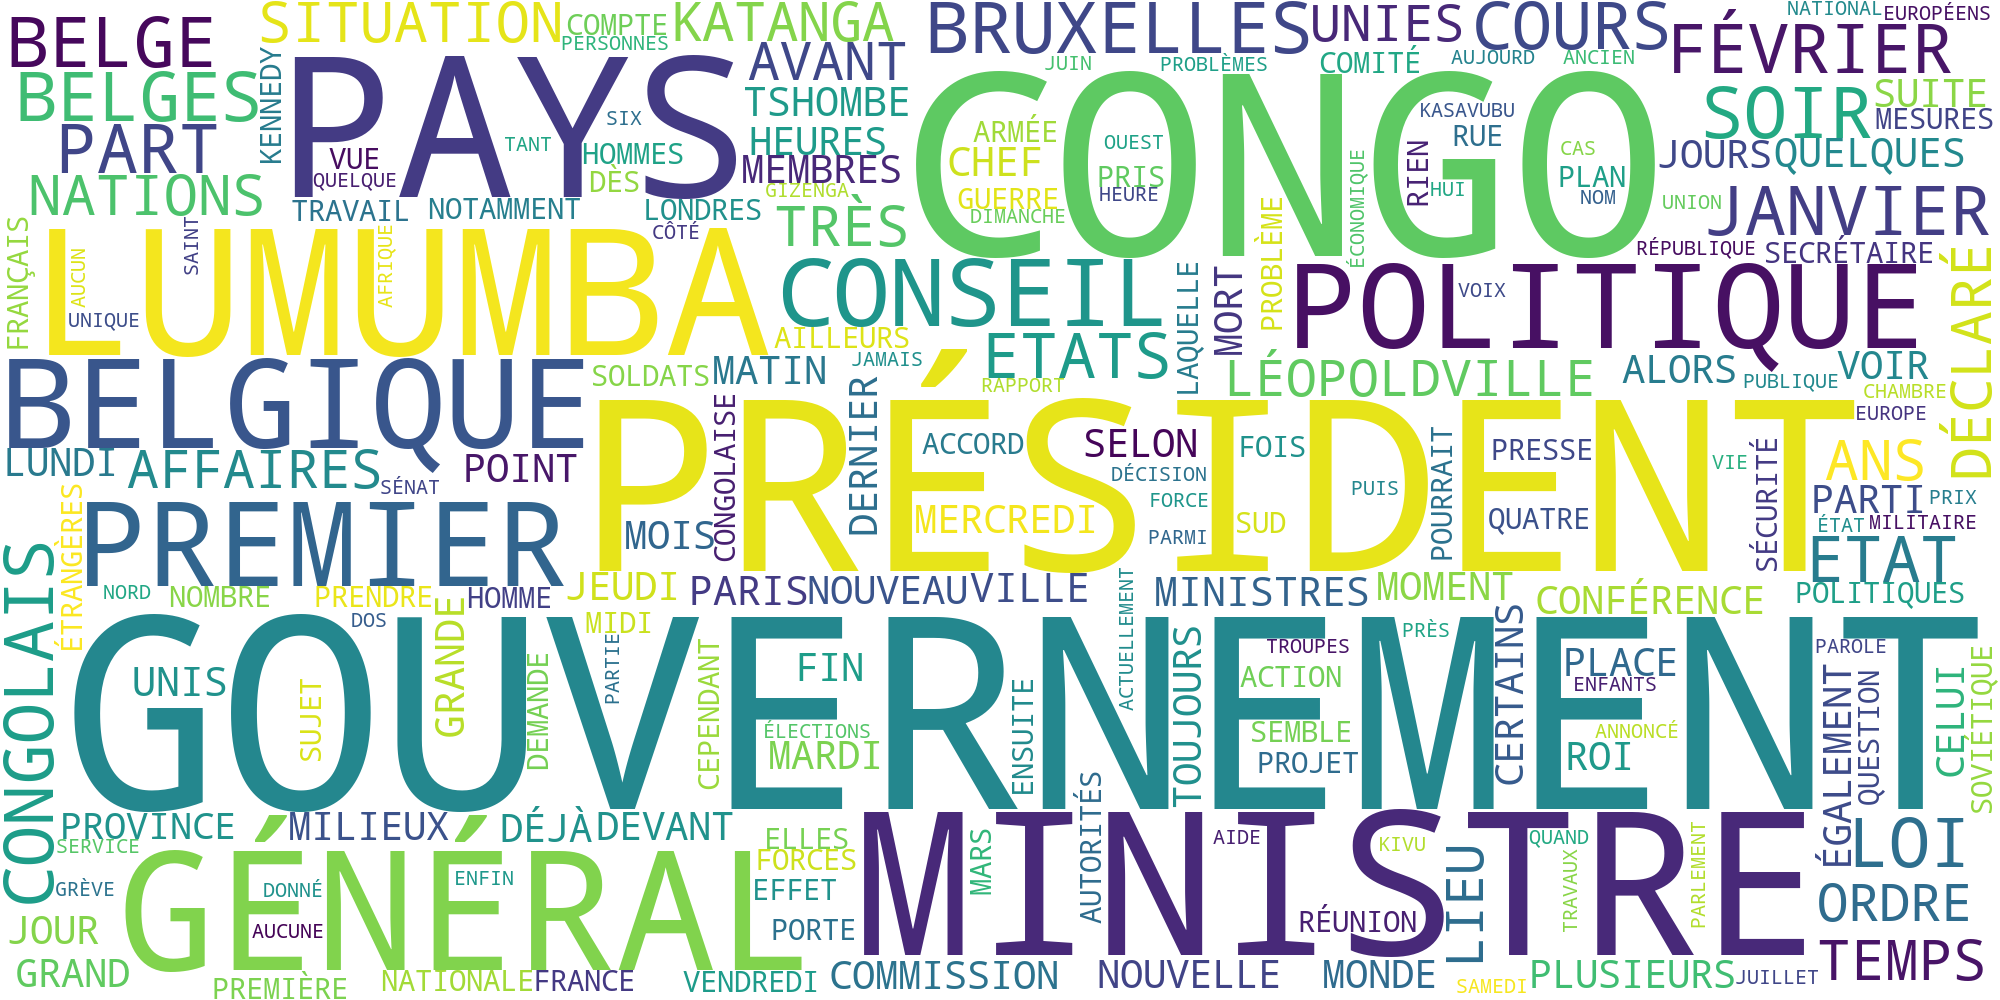

In [272]:
### Créer, stocker et afficher le nuage de mots
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

### Extraction des mots clés d'un document avec Yake

In [70]:
import os
import yake

In [71]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [72]:
# Lister les Fichiers
temp_path = '../data/tmp'
files = os.listdir(temp_path)

In [76]:
# Choisir le fichier de l'annéee choisie (1961)
this_file = files[1]
this_file

'1961.txt'

In [77]:
# Récupérer le texte du fichier de l'annéee choisie (1961)
text = open(os.path.join(temp_path, this_file), 'r', encoding='utf-8').read()
text[:500]

',* V ; t i ; ï\'. 1 J- ( /5* ANNEE - N” 1-2 JOURNAL quotidien 18 Pages - 2 fr. fiance : H. F. 0 Ir. 30 — Suisse : 0 fr. 40 suisses Congo ; 4 fr. CHEQUES POSTAUX PUBLICITE : Compte n» 5875 ROSSEL A C" VENTE i Soir el Soir ItlusM : 14886 Rossel A C" aux Œuvras du Soir : 14232 Rossel A C" les jncmuscrl/s lion Insérés ne sont pas rendus ■ \' ? cl 1 \'. \'t t -, vIl. V iÿ > ‘ j V ■ -V, : • -Ast\'’’ ,\\r. ! ;•» 0‘;Â * . . , \' «, <4 ! \\% 1 i w& ACE NC E ROSSEL - Annonces ef Publicité LE SOIR - Vente et Abonn'

In [ ]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

### Reconnaissance d'entités nommées avec SpaCy

In [568]:
# Imports
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

c:\Users\Paco\Documents\STIC-B545\tac\tac_venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
nlp = spacy.load('fr_core_news_md')

In [ ]:
# Appliquer la reconnaissance d'entités nommées sur notre corpus
# Charger le texte
n=100000
text = open("../data/tmp/1961.txt", encoding='utf-8').read()[:n]

In [ ]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 17.7 s
Wall time: 21 s


In [ ]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1


# Compter les entités
organisations = defaultdict(int)
for ent in doc.ents:
    if ent.label_== "ORG" and len(ent.text) > 3:
        organisations[ent.text] += 1

# Compter les entités
locations = defaultdict(int)
for ent in doc.ents:
    if ent.label_== "LOC" and len(ent.text) > 3:
        locations[ent.text] += 1

In [ ]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)
sorted_organisations = sorted(organisations.items(), key=lambda kv: kv[1], reverse=True)
sorted_locations = sorted(locations.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:100]:
    print(f"{person} apparait {freq} fois dans le corpus")
    
    for organisation, freq in sorted_organisations[:100]:
        print(f"{organisation} apparait {freq} fois dans le corpus")
        
        for location, freq in sorted_locations[:100]:
            print(f"{location} apparait {freq} fois dans le corpus")
            

Mobutu apparait 11 fois dans le corpus
Parlement apparait 18 fois dans le corpus
Kivu apparait 15 fois dans le corpus
Belgique apparait 14 fois dans le corpus
Etat apparait 12 fois dans le corpus
Bakwanga apparait 11 fois dans le corpus
Bukavu apparait 9 fois dans le corpus
Congo apparait 8 fois dans le corpus
Paris apparait 8 fois dans le corpus
Bruxelles apparait 8 fois dans le corpus
Belges apparait 7 fois dans le corpus
Ruanda-Urundi apparait 6 fois dans le corpus
Chambre apparait 7 fois dans le corpus
Kivu apparait 15 fois dans le corpus
Belgique apparait 14 fois dans le corpus
Etat apparait 12 fois dans le corpus
Bakwanga apparait 11 fois dans le corpus
Bukavu apparait 9 fois dans le corpus
Congo apparait 8 fois dans le corpus
Paris apparait 8 fois dans le corpus
Bruxelles apparait 8 fois dans le corpus
Belges apparait 7 fois dans le corpus
Ruanda-Urundi apparait 6 fois dans le corpus
O.N.U. apparait 6 fois dans le corpus
Kivu apparait 15 fois dans le corpus
Belgique apparait 14 

### recherches d'associations de mots

In [264]:

# Define the path to the corpus of text
path = "../data/all.txt"

# Open the file and read the content into a variable
with open(path, "r", encoding='utf-8') as file:
    corpus = file.read()

# Define the words you want to search for
word1 = "Lumumba"
word2 = "condamné"

# Use a regular expression to search for the words
pattern = r"\b" + word1 + r"\W+" + word2 + r"\b"
match = re.search(pattern, corpus)

# Print the result
if match:
    print("The words '" + word1 + "' and '" + word2 + "' were found in the corpus")
else:
    print("The words '" + word1 + "' and '" + word2 + "' were not found in the corpus")

The words 'Lumumba' and 'condamné' were found in the corpus


In [569]:

# Define the path to the corpus of text
path = "../data/all.txt"

# Open the file and read the content into a variable
with open(path, "r", encoding='utf-8') as file:
    corpus = file.read()

# Define the words you want to search for
word1 = "Lumumba"
word2 = "mort"

# Use a regular expression to search for the words
pattern = r"\b" + word1 + r"\W+" + word2 + r"\b"
match = re.search(pattern, corpus)

# Print the result
if match:
    print("The words '" + word1 + "' and '" + word2 + "' were found in the corpus")
else:
    print("The words '" + word1 + "' and '" + word2 + "' were not found in the corpus")

The words 'Lumumba' and 'mort' were found in the corpus


In [263]:

# Define the path to the corpus of text
path = "../data/all.txt"

# Open the file and read the content into a variable
with open(path, "r", encoding='utf-8') as file:
    corpus = file.read()

# Define the words you want to search for
word1 = "Lumumba"
word2 = "assassiné"

# Use a regular expression to search for the words
pattern = r"\b" + word1 + r"\W+" + word2 + r"\b"
match = re.search(pattern, corpus)

# Print the result
if match:
    print("The words '" + word1 + "' and '" + word2 + "' were found in the corpus")
else:
    print("The words '" + word1 + "' and '" + word2 + "' were not found in the corpus")

The words 'Lumumba' and 'assassiné' were not found in the corpus


In [266]:

# Define the path to the corpus of text
path = "../data/all.txt"

# Open the file and read the content into a variable
with open(path, "r", encoding='utf-8') as file:
    corpus = file.read()

# Define the words you want to search for
word1 = "Lumumba"
word2 = "tué"

# Use a regular expression to search for the words
pattern = r"\b" + word1 + r"\W+" + word2 + r"\b"
match = re.search(pattern, corpus)

# Print the result
if match:
    print("The words '" + word1 + "' and '" + word2 + "' were found in the corpus")
else:
    print("The words '" + word1 + "' and '" + word2 + "' were not found in the corpus")

The words 'Lumumba' and 'tué' were not found in the corpus


## Topic Modeling

In [1]:
# Import
import os

import spacy 
from spacy import displacy
from spacy.lang.fr.examples import sentences

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel, LsiModel, HdpModel

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

c:\Users\Paco\Documents\STIC-B545\tac\tac_venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Paco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# charger notre corpus
file = open(r"C:\Users\Paco\Documents\STIC-B545\tac\data\all.txt", "rt", encoding="utf-8")
n=100000
text = file.read()[:n]

##### Nettoyage des données

In [4]:
# verification avec Spacy
nlp = spacy.load('fr_core_news_md')

In [15]:
# Stopwords
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "les", "plus", "cette", 
       "fait", "faire", "être", "deux", "ceux", "toute", "tel", "ni", "ou",  "jamais", 
       "aussi", "pour", "de", "le", "la", "en", "une", "un", "votre", "notre", "leur",
       "trop", "vers", "peu", "ici", "leurs", "pres", "car", "tres", "des", "je", "il"]
sw = set(sw)

for stopword in sw:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

doc = nlp(text)

In [17]:
texts, article = [], []

for word in doc:
    
    if word.text != '\n' and not word.is_stop and not word.is_punct\
                         and not word.like_num and word.text != 'I':
        article.append(word.lemma_)
        
    if word.text == '\n':
        texts.append(article)
        article = []
        
print(texts[0])

['invite', 'israël', 'juif', 'il', 'quitter', 'Allemagne']


In [18]:
bigram = gensim.models.phrases.Phrases(texts)
texts = [bigram[line] for line in texts]
texts = [bigram[line] for line in texts]
print(texts[0])

['invite', 'israël', 'juif', 'il', 'quitter', 'Allemagne']


In [20]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
print(corpus[1])

[(0, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)]


##### Modelisation

In [21]:
# Allocation de Dirichlet latente
lda_model = LdaModel(corpus=corpus, num_topics= 10, id2word=dictionary)
lda_model.show_topics()

[(0,
  '0.013*"m." + 0.007*"prix" + 0.006*"général" + 0.006*"janvier" + 0.005*"grand" + 0.004*"national" + 0.004*"parti" + 0.004*"président" + 0.003*"cours" + 0.003*"samedi"'),
 (1,
  '0.006*"Belgique" + 0.005*"politique" + 0.004*"bon" + 0.004*"degré" + 0.004*"Bruxelles" + 0.003*"Paris" + 0.003*"soviétique" + 0.003*"nazi" + 0.003*"commission" + 0.003*"mm."'),
 (2,
  '0.010*"m." + 0.006*"mardi" + 0.005*"dernier" + 0.004*"comité" + 0.004*"accord" + 0.004*"président" + 0.004*"nouveau" + 0.003*"force" + 0.003*"café" + 0.003*"janvier_A.F.P."'),
 (3,
  '0.009*"m." + 0.007*"pays" + 0.006*"belge" + 0.005*"Brésil" + 0.004*"ministre" + 0.004*"annoncer" + 0.004*"groupe" + 0.004*"peuple" + 0.004*"gouvernement" + 0.004*"pouvoir"'),
 (4,
  '0.006*"m." + 0.006*"do" + 0.005*"Moscou" + 0.004*"heure" + 0.004*"U.R.S.S." + 0.004*"soviétique" + 0.004*"Belgique" + 0.004*"prendre" + 0.004*"organisation" + 0.004*"rendre"'),
 (5,
  '0.011*"m." + 0.006*"Paris" + 0.005*"Etats-Unis" + 0.005*"heure" + 0.005*"améri

In [22]:
# Visualisation interactifs des modeles de sujet avec pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

c:\Users\Paco\Documents\STIC-B545\tac\tac_venv\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.012236  0.126377       1        1  11.920810
0      0.063718 -0.044497       2        1  11.710224
2     -0.010896 -0.018953       3        1  10.195444
3      0.035610  0.018030       4        1  10.143709
6      0.073551 -0.013759       5        1  10.081703
9      0.046212  0.042823       6        1  10.029456
8      0.022810  0.019995       7        1   9.710613
4     -0.106263 -0.013364       8        1   9.241567
7      0.002811 -0.108037       9        1   8.973167
1     -0.115317 -0.008616      10        1   7.993306, topic_info=               Term       Freq      Total Category  logprob  loglift
22          général  23.000000  23.000000  Default  30.0000  30.0000
4              juif  13.000000  13.000000  Default  29.0000  29.0000
692           grand  16.000000  16.000000  Default  28.0000  28.0000
334          Brésil   7.000000   7.000000  Default  27.0000  27.0000
264           belge  11.000000  11.000000  Default  26.0000  26.0000
...             ...        ...        ...      ...      ...      ...
12    antisémitisme   1.440665   8.941287  Topic10  -6.1040   0.7010
82           ancien   1.435821   5.595739  Topic10  -6.1074   1.1663
306          comité   1.435444  13.076798  Topic10  -6.1076   0.3172
1547         réunir   1.434769   7.819208  Topic10  -6.1081   0.8310
667         pouvoir   1.428557  14.767528  Topic10  -6.1124   0.1908

[764 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
203       1  0.157306       -t_il
203       4  0.157306       -t_il
203       5  0.157306       -t_il
203       6  0.314613       -t_il
426       9  0.722820  -urprendra
...     ...       ...         ...
2707      5  0.474602     évoluer
2605      7  0.732523         ônt
535       2  0.516941           ■
535       5  0.172314           ■
535      10  0.172314           ■

[1617 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 3, 4, 7, 10, 9, 5, 8, 2])

## Clustering de documents

In [98]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [99]:
from sklearn.datasets import make_blobs
import numpy as np


In [100]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Paco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [101]:
data_path = "../data/txt/"

In [102]:
# Choisir une décennie
DECADE = '1960'

In [105]:
# Charger tous les fichiers de la décennie et en créer une liste de textes
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [106]:
# Exemple de fichiers
files[:10]

['KB_JB838_1960-01-06_01-00003.txt',
 'KB_JB838_1960-01-10_01-00003.txt',
 'KB_JB838_1960-01-13_01-00003.txt',
 'KB_JB838_1960-01-19_01-00003.txt',
 'KB_JB838_1960-01-21_01-00005.txt',
 'KB_JB838_1960-01-22_01-00003.txt',
 'KB_JB838_1960-01-23_01-00003.txt',
 'KB_JB838_1960-01-26_01-00003.txt',
 'KB_JB838_1960-01-27_01-00003.txt',
 'KB_JB838_1960-01-31_01-00002.txt']

In [107]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [108]:
# Exemple de textes
texts[0][:500]

"INVITES EN ISRAËL Quelque trente mille Juifs vont-ils quitter l'Allemagne ! la renaissance de l'antisémitisme est un danger pour l'humanité tout entière Jérusalem, 5 janvier (AJ?., A.F.P Ct Ur) C ^groupe minoritaire d’extrême «nnrhe du « Conseil général sionis f P ,S invité les quelque 30.000 juifs ip,tant en Allemagne de quitter ce oays pour gagner l’Etat d’Israël. P Le délégué du parti de droite He- ruth « demandé, quant à lui, qu’il Lit souligné dans le texte de la ré- solution du Conseil, qu"

##### Quelques statistiques au sujet de la decade choisie

In [ ]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
    else:
        print(f"Anomalous file: {f}")

In [ ]:
# nombre de fichiers pour la décennie choisie
print(f"Il y a {count_decade['1960s']} fichiers pour la décennie 1960s")

Il y a 500 fichiers pour la décennie 1960s


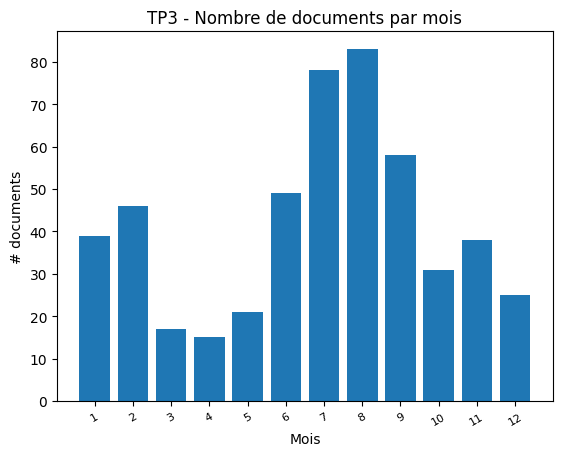

In [ ]:
# Visualisation du nombre de document par mois
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('TP4 - Nombre de documents par mois')
plt.show()

##### Vectoriser les documents à l'aide de TF-IDF

In [113]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [114]:
# Instancier le modèle TF-IDF avec ses arguments
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [115]:
# Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`
tfidf_vectors = vectorizer.fit_transform(texts)

In [ ]:
# Détail de la matrice
tfidf_vectors

<500x3705 sparse matrix of type '<class 'numpy.float64'>'
	with 388403 stored elements in Compressed Sparse Row format>

In [ ]:
# Imprimer le vecteur tf-IDF du premier documentpd.Series
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

janvier      0.480308
croix        0.212310
hausse       0.136344
murs         0.130109
allemagne    0.128294
               ...   
fermement    0.000000
fermeture    0.000000
fermeté      0.000000
feront       0.000000
lancer       0.000000
Length: 3705, dtype: float64

##### Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

In [109]:
from sklearn.datasets import make_blobs
import numpy as np

In [90]:
# Trouver le nombre optimal de clusters (n_clusters) avec la méthode Elbow
X, y = make_blobs(n_samples=1000, n_features=2,random_state=0)
# Within-cluster Sum of Square (WSS)- somme des carrés intra-cluster
WSS = []
# Pour les valeur possible de 'k'
K = range(2, 10)
for n in K:
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(X)
    WSS.append(algorithm.inertia_)

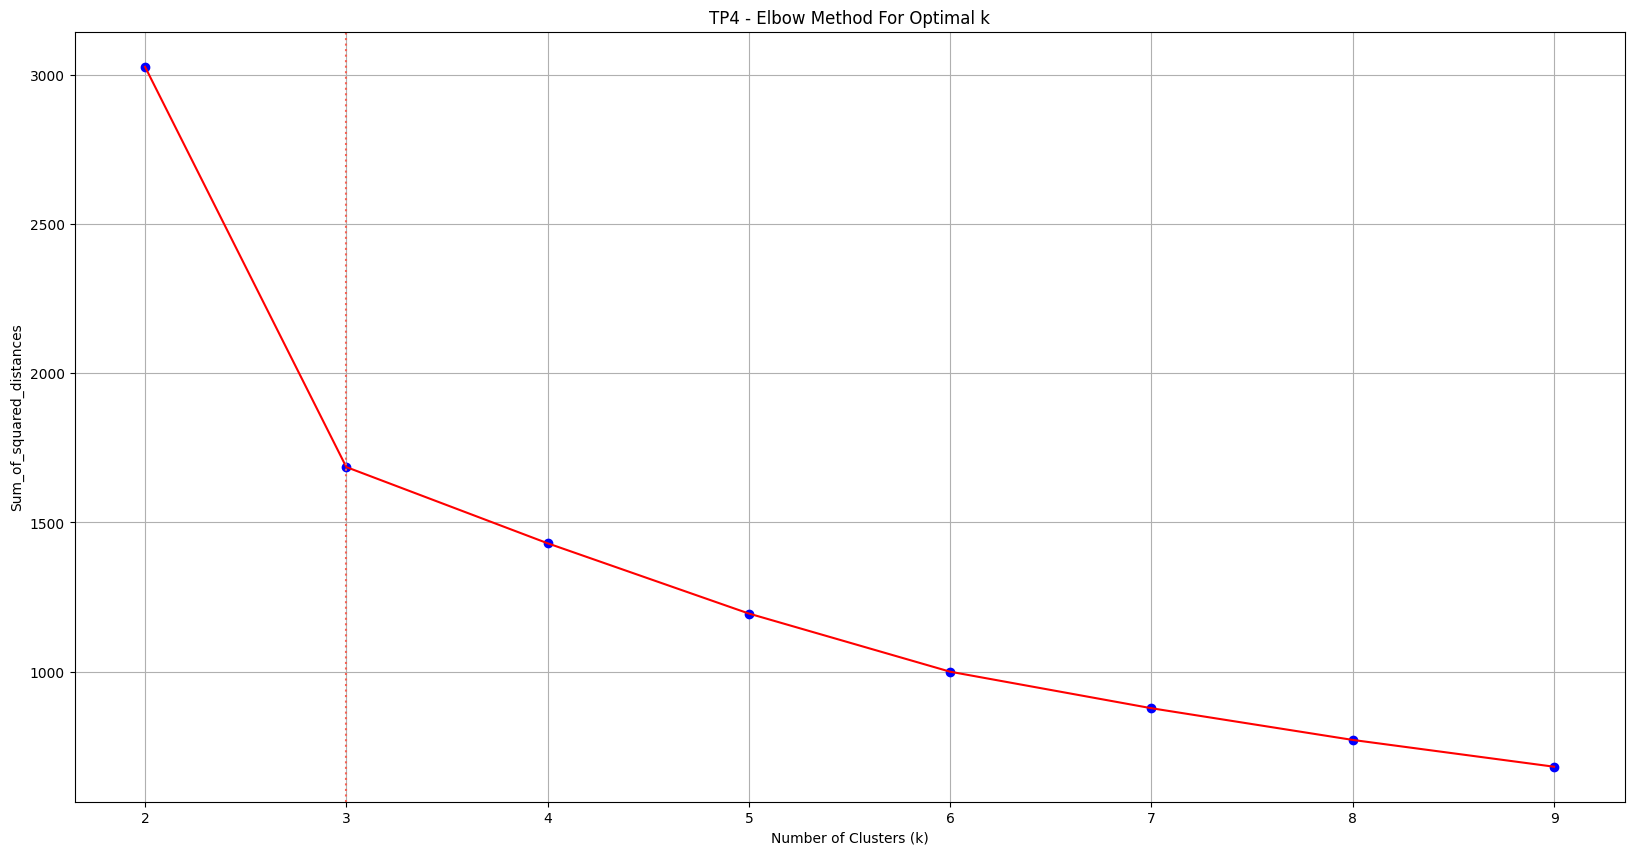

In [91]:
fig, (ax1) = plt.subplots(ncols =1)
# fig, (ax1) = plt.subplots(ncols =1)
fig.set_figheight(10)
fig.set_figwidth(20)

ax1.plot(K, WSS, 'bo')
ax1.plot(K, WSS, 'r-', alpha = 1)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum_of_squared_distances')
ax1.set_title('TP4 - Elbow Method For Optimal k')
ax1.grid(True)

ax1.axvline(3, color='#F26457', linestyle=':')

In [110]:
# Définir un nombre de clusters
N_CLUSTERS = 3

In [111]:
# Instancier le modèle K-Means et ses arguments
km_model = KMeans(n_clusters=N_CLUSTERS)

In [116]:
# Appliquer le clustering à l'aide de la fonction `fit_predict`
clusters = km_model.fit_predict(tfidf_vectors)

In [117]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [ ]:
pprint(dict(clustering))

##### Visualiser les clusters

In [136]:
# Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [119]:
reduced_vectors[:10]

array([[ 0.0955171 , -0.15881128],
       [ 0.05814139, -0.09612702],
       [ 0.12799457, -0.18457734],
       [ 0.07134323, -0.14017688],
       [-0.11623988, -0.00200578],
       [ 0.07938844, -0.16802996],
       [ 0.09551331, -0.16695311],
       [ 0.05756717, -0.18100235],
       [ 0.13245283, -0.22358859],
       [-0.09728483, -0.08317619]])

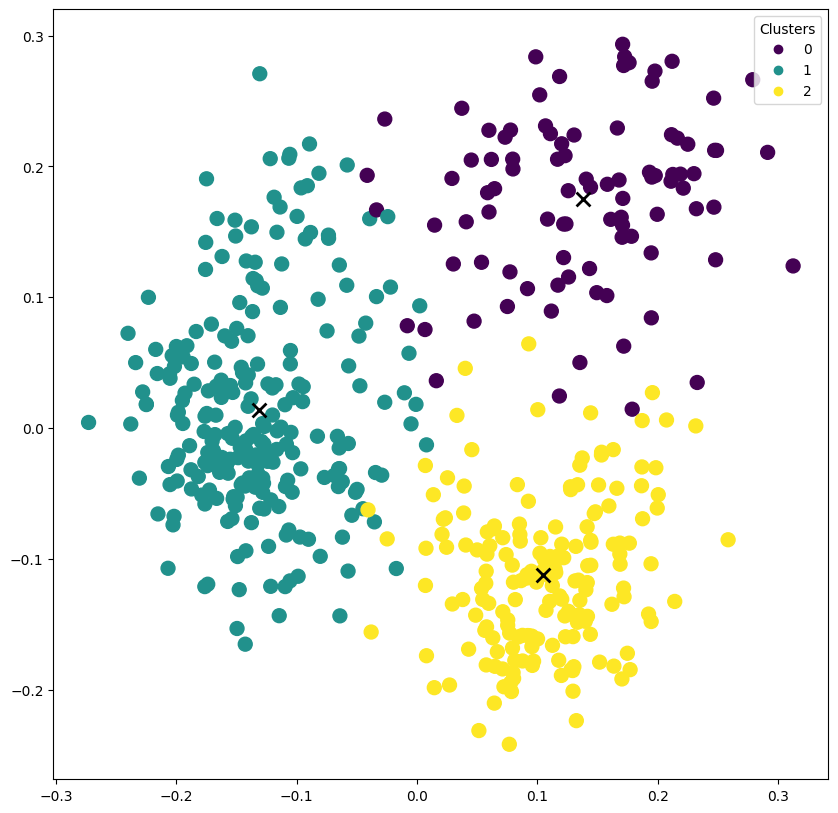

In [ ]:
# Générer le plot
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

## Sentiment analysis avec Textblob-FR

In [277]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [279]:
## Fonction
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

## Analyser le sentiment d'une phrase

In [327]:
get_sentiment("Lumumba est mort.")

This text is neutral and perfectly objective.


In [328]:
get_sentiment("A vrai dire, cette amitié a connu bien des hauts et des bas.") 

This text is 13% positive and 0.21999999999999997% subjective.


In [329]:
get_sentiment("Lumumba se prononce contre le fédéralisme.")

This text is neutral and perfectly objective.


In [330]:
get_sentiment("Tant quil ne pleut pas des bombes, on peut s'estimer heureux.") 

This text is 70% positive and 0.8% subjective.


In [331]:
get_sentiment("L’agression s’était soldée par sept blessés, dont deux sérieusement atteints..")  

This text is 40% negative and 0.15% subjective.


In [332]:
get_sentiment("Les conditions de la déportation et de la mort de ces politiciens sont tout à fait semblables à celles qu’a connues Lumumba.")

This text is 27% positive and 0.13333333333333333% subjective.


In [333]:
get_sentiment("Il pleut aussi des feuilles mortes que le vent arrache aux arbres.")

This text is neutral and perfectly objective.


In [334]:
get_sentiment("On sait qu’une controverse s’est produite à propos de la présence du Roi aux fêtes de l’iniépendance du Congo.")

This text is neutral and perfectly objective.


In [335]:
get_sentiment("Les conditions de la déportation et de la mort de ces politiciens sont tout à fait semblables à celles qu’a connues Lumumba.")

This text is 27% positive and 0.13333333333333333% subjective.


In [336]:
get_sentiment("L’éditeur nous signale que le manuscrit porte la trace des hésitations et des tourments du jeune leader.")

This text is 32% positive and 0.4% subjective.


In [337]:
get_sentiment("Lumumba a déclaré qu’il avait toujours été opposé au régime colonial.")

This text is 5% negative and 0.1% subjective.


## Word Embeddings : le modèle Word2Vec

In [391]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

#### Chargement et traitement des phrases du corpus

In [392]:
# Création d'un objet qui *streame* les lignes d'un fichier pour économiser de la RAM
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [393]:
infile = f"../data/sents.txt"
sentences = MySentences(infile)

In [394]:
# Détection des bigrams
bigram_phrases = Phrases(sentences)

In [395]:
type(bigram_phrases.vocab)

dict

In [396]:
len(bigram_phrases.vocab.keys())

1049235

In [403]:
# Prenons une clé au hasard
key_ = list(bigram_phrases.vocab.keys())[150]
print(key_)

parti


In [404]:
# Le dictionnaire indique le score de cette coocurrence
bigram_phrases.vocab[key_]

1736

In [405]:
# Conversion des `Phrases` en objet `Phraser`
bigram_phraser = Phraser(phrases_model=bigram_phrases)

In [406]:
# Extraction des trigrams
trigram_phrases = Phrases(bigram_phraser[sentences])

In [407]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [408]:
# Création d'un corpus d'unigrams, bigrams, trigrams
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [409]:
print(corpus[:100])

[['invites', 'en', 'israel', 'quelque', 'trente_mille', 'juifs', 'vont', '-', 'ils', 'quitter', 'l', "'", 'allemagne', '!'], ['la', 'renaissance', 'de', 'l', "'", 'antisemitisme', 'est', 'un', 'danger', 'pour', 'l', "'", 'humanite', 'tout_entiere', 'jerusalem', ',', '5_janvier', '(_aj', '?.,', 'a', '.', 'f', '.', 'p', 'ct', 'ur', ')', 'c', '^', 'groupe', 'minoritaire', 'd', "'", 'extreme', '<<', 'nnrhe', 'du', '<<', 'conseil', 'general', 'sionis', 'f', 'p', ',', 's', 'invite', 'les', 'quelque', '30', '.', '000_juifs', 'ip', ',', 'tant', 'en_allemagne', 'de', 'quitter', 'ce', 'oays', 'pour_gagner', 'l', "'", 'etat', 'd', "'", 'israel', '.'], ['p', 'le', 'delegue', 'du', 'parti', 'de', 'droite', 'he', '-', 'ruth', '<<', 'demande', ',', 'quant', 'a', 'lui', ',', 'qu', "'", 'il', 'lit', 'souligne', 'dans', 'le', 'texte', 'de', 'la', 're', '-', 'solution', 'du_conseil', ',', 'qu', "'", 'une_solution', 'au', 'probleme', 'juif', 'ne_pouvait', 'etre_trouvee', 'que', 'dans', 'un', 'regroupement

#### Entrainement d'un modèle Word2Vec sur ce corpus

In [528]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=2, # La taille du "contexte", ici 2 mots avant et après le mot observé
    min_count=10, # On ignore les mots qui n'apparaissent pas au moins 10 fois dans le corpus
    workers=2, # Pas de parallelisation
    epochs=1 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 34.8 s
Wall time: 47.6 s


In [529]:
# Sauver le modèle dans un fichier
outfile = f"../data/newspapers.model"
model.save(outfile)

##### Explorer le modèle

In [531]:
# Charger le modèle en mémoire
model = Word2Vec.load("../data/newspapers.model")

In [532]:
# Imprimer le vecteur d'un terme
model.wv["etat"]

array([-2.1108623 , -0.24512011,  0.52057886,  1.7922815 , -2.0654447 ,
       -0.7619623 ,  0.8176963 ,  2.0471983 ,  0.5435341 , -0.34639072,
        1.3139282 ,  0.03674344,  0.81089675,  0.978248  , -0.56350833,
       -2.2576628 , -1.364961  ,  1.5257418 ,  0.5187032 ,  1.0546317 ,
        1.8896835 ,  0.3368689 ,  2.464549  ,  0.08911724,  0.23279567,
        0.7562518 , -0.639604  , -0.51002944, -0.34838703, -1.7625008 ,
       -1.6671071 ,  0.1723748 ], dtype=float32)

In [533]:
# Calculer la similarité entre deux termes: Exemple 1
model.wv.similarity("etat", "administration")

0.8959558

In [552]:
# Calculer la similarité entre deux termes: Exemple 2
model.wv.similarity("etat", "royaume")

0.542457

In [553]:
# Calculer la similarité entre deux termes: Exemple 3
model.wv.similarity("etat", "etat")

0.99999994

In [554]:
# Chercher les mots les plus proches d'un terme donné: Exemple 1
model.wv.most_similar("gouvernement_congolais", topn=4)

[('gouvernement_belge', 0.991592526435852),
 ('peuple', 0.983726441860199),
 ('debat', 0.9787542223930359),
 ('mouvement', 0.978613555431366)]

In [555]:
# Chercher les mots les plus proches d'un terme donné: Exemple 2
model.wv.most_similar("volume", topn=4)

[('plafond', 0.9789493083953857),
 ('tirage', 0.9726207852363586),
 ('pourcentage', 0.9691596031188965),
 ('quai', 0.9674696326255798)]

In [545]:
# Faire des recherches complexes à travers l'espace vectoriel : Exemple 1
print(model.wv.most_similar(positive=['enseignement', 'premier_ministre'], negative=['ecole'], topn=1))

[('gouvernement', 0.916886568069458)]


In [556]:
# Faire des recherches complexes à travers l'espace vectoriel : Exemple 2
print(model.wv.most_similar(positive=['premier_ministre', 'president'], negative=['lumumba'], topn=1))

[('vice_-_president', 0.8964546322822571)]
